In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from time import sleep
from urllib.parse import quote
from bs4 import BeautifulSoup
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.keys import Keys
import re
from openpyxl import Workbook
from selenium.common.exceptions import ElementNotInteractableException
from selenium.common.exceptions import NoSuchElementException
#-----------------------------------------------------------------
import datetime
import time
import random
import cx_Oracle
import sys
import pandas as pd
import numpy as np
import os
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
from PIL import *
import statistics as stt
from kiwipiepy import Kiwi
from typing import List
from konlpy.tag import Okt
from textrankr import TextRank

1. Main Keyword 제목 크롤링
2. DB Insert
3. Keyword Count -> Sub Keyword 추출
4. DB Insert
5. Main+Sub 제목 크롤링
6. DB Insert
7. Keyword Count -> Detail Keyword 추출
8. DB Insert
9. Detail 제목, 링크, 크롤링
10.DB Insert
11.Detail 스크립트 크롤링
12.DB Insert
13.스크립트 분석 Kiwi & Text Rank

In [2]:
#db연결-----------------------------------------------------------------------------------------------------------------------
cx_Oracle.init_oracle_client(lib_dir=r"C:\instantclient-basic-windows.x64-21.9.0.0.0dbru\instantclient_21_9")
#-----------------------------------------------------------------------------------------------------------------------------

# 0. 키워드 입력

In [4]:
main_k = input('어떤 키워드를 검색하시겠습니까?? : ')

어떤 키워드를 검색하시겠습니까?? : 퇴직


# 1. Main Keyword 제목 크롤링

In [5]:
def title_crawling(Keyword):
    #원하는 검색어 입력받음
    keyword = Keyword
    
    print("크롤링을 시작합니다.")
    
    #URL 지정 및 실행
    URL = f"https://www.youtube.com/results?search_query={quote(keyword)}"
    driver.get(URL)
    
#     print('크롤링 중입니다 ...')
#     #필터 버튼 클릭
#     driver.find_element(By.XPATH, '//*[@id="container"]/ytd-toggle-button-renderer/yt-button-shape/button/yt-touch-feedback-shape/div/div[2]').click()
#     sleep(1)

#     #이번 달 클릭
#     upload_date = driver.find_element(By.XPATH,'//*[@id="collapse-content"]/ytd-search-filter-group-renderer[1]')
#     sleep(1)
#     click_list_1 = upload_date.find_elements(By.ID,"endpoint")
#     sleep(1)
#     click_list_1[3].click()
#     sleep(1)
    print('크롤링 중입니다 ...')
    sleep(1)
    #필터 버튼 클릭
    driver.find_element(By.XPATH, '//*[@id="container"]/ytd-toggle-button-renderer/yt-button-shape/button/yt-touch-feedback-shape/div/div[2]').click()
    sleep(1)
    
    #4~20분 클릭
    length = driver.find_element(By.XPATH,'//*[@id="collapse-content"]/ytd-search-filter-group-renderer[3]')
    sleep(0.5)
    click_list_2 = length.find_elements(By.ID,"endpoint")
    sleep(0.5)
    click_list_2[1].click()
    sleep(1)
    
    print('크롤링 중입니다 ...')
    
    #스크롤 함수 실행
    scroll()

    
    # 페이지 소스 추출
    html_source = driver.page_source
    soup_source = BeautifulSoup(html_source, 'html.parser')

    # 콘텐츠 모든 정보
    content_total = soup_source.find_all(class_ = 'yt-simple-endpoint style-scope ytd-video-renderer')
    # 콘텐츠 제목만 추출
    content_total_title = list(map(lambda data: data.get_text().replace("\n", ""), content_total))
     # 콘텐츠 링크만 추출
    content_total_link = list(map(lambda data: "https://youtube.com" + data["href"], content_total))

    
    list2 = []
    for i in range(len(content_total_title)):
        title = cleansing_sentence(content_total_title[i])
        link = content_total_link[i]
        list2.append([keyword,title,link])
        
    print("크롤링 완료했습니다.")
    
    df = pd.DataFrame(data = list2, columns = ['Keyword','Title','Link'])
    return df

In [6]:
def scroll():
    last_height = driver.execute_script("return document.documentElement.scrollHeight")

    for i in range(10): # 스크롤 횟수 지정
        driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
        #time.sleep(1.5)
        time.sleep(1)

        new_height = driver.execute_script("return document.documentElement.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height    

In [7]:
def cleansing_sentence(input_string):
    string_pattern = re.compile(r'[^ㄱ-힣 0-9 a-z A-Z]')
    cleansing_string = string_pattern.sub('', input_string)
    return cleansing_string

In [9]:
#크롤링 세팅-------------------------------------------------------------------------------------------------------------------
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--start-maximized')
driver = webdriver.Chrome(chrome_options=chrome_options)
service = Service(ChromeDriverManager().install())
#------------------------------------------------------------------------------------------------------------------------------
mtitle_df = title_crawling(main_k)

C:\Users\Hyeon\AppData\Local\Temp\ipykernel_9244\1881748597.py:4: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chrome_options=chrome_options)


크롤링을 시작합니다.
크롤링 중입니다 ...
크롤링 중입니다 ...
크롤링 완료했습니다.


In [10]:
mtitle_df

,Keyword,Title,Link
0,퇴직,54세 삼성전자 퇴직 후 깨닫게 된 피눈물나는 재취업 현실 나이 60세가 넘으니 알...,https://youtube.com/watch?v=l5dIuu-I880&pp=ygU...
1,퇴직,50대 60대 직장인 퇴직 후 비참해 지지 않으려면 이 3가지 목숨걸고 미리 챙기...,https://youtube.com/watch?v=SVnWBOEbHrk&pp=ygU...
2,퇴직,7월12일 의무화 퇴직연금 사전지정운용제도 더 미루면 안됩니다 당장 공부하세요,https://youtube.com/watch?v=wue9xTC5_Gk&pp=ygU...
3,퇴직,대기업 퇴사 6개월 현실 조기퇴직자 간절한 조언,https://youtube.com/watch?v=c2XxDlReels&pp=ygU...
4,퇴직,퇴직전에 IRP 계좌를 2개 이상 만들어야 하는 이유,https://youtube.com/watch?v=w43LfHPoMfk&pp=ygU...
...,...,...,...
209,퇴직,최대리 전산회계1급 제82강 퇴직급여충당부채,https://youtube.com/watch?v=FyRAJWQpFY0&pp=ygU...
210,퇴직,생활행정학 퇴직공직자 취업제한을 배워보자,https://youtube.com/watch?v=XIA8b2vIPzE&pp=ygU...
211,퇴직,근로복지공단 퇴직연금 가입자 교육 영상,https://youtube.com/watch?v=nstUIZmkKM0&pp=ygU...
212,퇴직,건강 보험 퇴직 예정자를 위한 교육 자료,https://youtube.com/watch?v=5KkOV0MLKe0&pp=ygU...


# 2. DB Insert

In [11]:
def db_reset(dbname):
    DB=dbname
    
    conn = cx_Oracle.connect(user='admin', password='Tongbrown@23', dsn='tongbrown_high')
    print('')
    print('DB Connect 성공!!')
    print('')

    cs = conn.cursor()
    
    sql = f"DELETE FROM {DB}"
    cs.execute(sql)
    deleted_rows = cs.rowcount
    print(f"{deleted_rows} rows deleted")
    print('')
    
    cs.close()
    
    conn.commit()
    print('Commit 완료!!')
    print('')
    
    conn.close()
    print('DB Disconnect 완료!!')
    print('')

In [12]:
def a_mtitle_insert(DF): 
    df = DF
    Main_k = list(df['Keyword'])
    Link = list(df['Link'])
    Title = list(df['Title'])
    
    
    conn = cx_Oracle.connect(user='admin', password='Tongbrown@23', dsn='tongbrown_high')
    print('')
    print('DB Connect 성공!!')
    print('')
    
    cs = conn.cursor()
    for i in range(len(df)):
        main_k = Main_k[i]
        link = Link[i]
        title = Title[i]
        sql = "INSERT INTO A_MTITLE (MAIN_K, LINK, TITLE) VALUES (:1, :2, :3)"
        cs.execute(sql, (main_k, link, title))
    
    cs.close()
    
    conn.commit()
    print('Commit 완료!!')
    print('')
    
    conn.close()
    print('DB Disconnect 완료!!')
    print('')

In [13]:
# db_reset('A_MTITLE')

In [14]:
a_mtitle_insert(mtitle_df)


DB Connect 성공!!

Commit 완료!!

DB Disconnect 완료!!



# 3. Keyword Count -> Sub Keyword 추출

In [15]:
def okt_noun_count(column):
    okt = Okt()
    arr = np.array(column)
    temp = []
    for i in range(len(arr)):
        temp.append(okt.nouns(arr[i]))
    noun = sum(temp,[])
    df = pd.DataFrame({'Noun':noun})
    noun_set = set(noun)
    noun_kind = list(noun_set)
    num=[]
    j=0
    for i in range(len(noun_kind)):
        num.append(len(df[df['Noun']==noun_kind[j]]))
        j=j+1
    #데이터프레임 생성 및 정렬
    df1 = pd.DataFrame({'Noun':noun_kind,'count':num})
    df1s = df1.sort_values('count',ascending=False)
    return df1s

In [16]:
mtitle_noun_count = okt_noun_count(mtitle_df['Title']).head(20)

In [17]:
mtitle_noun_count

,Noun,count
587,퇴직,262
562,연금,113
255,후,36
480,은퇴,27
397,방법,25
98,퇴직금,22
661,가지,21
568,노후,20
142,준비,20
609,공무원,18


# 4. DB Insert

In [18]:
def a_m_count_insert(DF): 
    df = DF
    Noun = list(df['Noun'])
    Count = list(df['count'])
    
    
    conn = cx_Oracle.connect(user='admin', password='Tongbrown@23', dsn='tongbrown_high')
    print('')
    print('DB Connect 성공!!')
    print('')
    
    cs = conn.cursor()
    for i in range(len(df)):
        sub_k = Noun[i]
        count = Count[i]
        sql = "INSERT INTO A_M_COUNT (MAIN_K, NOUN, COUNT) VALUES (:1, :2, :3)"
        cs.execute(sql, (main_k, sub_k, count))
    
    cs.close()
    
    conn.commit()
    print('Commit 완료!!')
    print('')
    
    conn.close()
    print('DB Disconnect 완료!!')
    print('')

In [19]:
# db_reset('A_M_COUNT')

In [20]:
a_m_count_insert(mtitle_noun_count)


DB Connect 성공!!

Commit 완료!!

DB Disconnect 완료!!



# 5. Main+Sub 제목 크롤링

In [21]:
msub_k = '퇴직 연금'

In [24]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--start-maximized')
driver = webdriver.Chrome(chrome_options=chrome_options)
service = Service(ChromeDriverManager().install())
#------------------------------------------------------------------------------------------------------------------------------
mstitle_df = title_crawling(msub_k)

C:\Users\Hyeon\AppData\Local\Temp\ipykernel_9244\1958263933.py:3: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chrome_options=chrome_options)


크롤링을 시작합니다.
크롤링 중입니다 ...
크롤링 중입니다 ...
크롤링 완료했습니다.


In [25]:
mstitle_df

,Keyword,Title,Link
0,퇴직 연금,7월12일 의무화 퇴직연금 사전지정운용제도 더 미루면 안됩니다 당장 공부하세요,https://youtube.com/watch?v=wue9xTC5_Gk&pp=ygU...
1,퇴직 연금,퇴직금 vs 퇴직연금 3총사 DB형DC형IRP 총정리DB와 DC장단점 모르면 손해,https://youtube.com/watch?v=OyeHn7Q3-YQ&pp=ygU...
2,퇴직 연금,혹시 디폴트 옵션 문자받고 상품 지정하셨나요,https://youtube.com/watch?v=UOd5e4vBg6Q&pp=ygU...
3,퇴직 연금,퇴직 전에 IRP계좌 3개는 꼭 만들어야하는 이유,https://youtube.com/watch?v=QzkCrfZuXHk&pp=ygU...
4,퇴직 연금,퇴직연금 DB DC IRP 이 영상 하나로 정리한다 ㅣ 더이상 고민고민 하지마,https://youtube.com/watch?v=O9F2D-MKM7Q&pp=ygU...
...,...,...,...
210,퇴직 연금,IRP 퇴직연금 수령 절차와 과세 및 절세,https://youtube.com/watch?v=1o5NsTSdr_M&pp=ygU...
211,퇴직 연금,중소기업퇴직연금기금제도로 퇴직금 준비하세요,https://youtube.com/watch?v=hWXXujCLGZs&pp=ygU...
212,퇴직 연금,30대직장인투자이론 퇴직연금 DC형 전환 언제가 좋을까,https://youtube.com/watch?v=2moQKWGX23Q&pp=ygU...
213,퇴직 연금,회계 실무 처리를 위해 퇴직연금 뭘 공부해야 하지,https://youtube.com/watch?v=Ucy5ozOdqTc&pp=ygU...


# 6. DB Insert

In [26]:
def a_mstitle_insert(DF): 
    df = DF
    MSUB_K = list(df['Keyword'])
    Link = list(df['Link'])
    TITLE = list(df['Title'])
    
    
    conn = cx_Oracle.connect(user='admin', password='Tongbrown@23', dsn='tongbrown_high')
    print('')
    print('DB Connect 성공!!')
    print('')
    
    cs = conn.cursor()
    for i in range(len(df)):
        msub_k = MSUB_K[i]
        link = Link[i]
        title = TITLE[i]
        sql = "INSERT INTO A_MSTITLE (MSUB_K, LINK, TITLE) VALUES (:1, :2, :3)"
        cs.execute(sql, (msub_k, link, title))
    
    cs.close()
    
    conn.commit()
    print('Commit 완료!!')
    print('')
    
    conn.close()
    print('DB Disconnect 완료!!')
    print('')

In [27]:
# db_reset('a_MSTITLE')

In [28]:
a_mstitle_insert(mstitle_df)


DB Connect 성공!!

Commit 완료!!

DB Disconnect 완료!!



# 7. Keyword Count -> Detail Keyword 추출

In [29]:
mstitle_noun_count = okt_noun_count(mstitle_df['Title']).head(20)

In [30]:
mstitle_noun_count

,Noun,count
496,연금,287
514,퇴직,255
448,형,37
96,퇴직금,33
586,투자,29
360,방법,26
515,디폴트,26
611,옵션,26
466,개인,20
53,상품,16


# 8. DB Insert

In [31]:
def a_ms_count_insert(DF): 
    df = DF
    Noun = list(df['Noun'])
    Count = list(df['count'])
    
    
    conn = cx_Oracle.connect(user='admin', password='Tongbrown@23', dsn='tongbrown_high')
    print('')
    print('DB Connect 성공!!')
    print('')
    
    cs = conn.cursor()
    for i in range(len(df)):
        det_k = Noun[i]
        count = Count[i]
        sql = "INSERT INTO A_MS_COUNT (MAINSUB_K, NOUN, COUNT) VALUES (:1, :2, :3)"
        cs.execute(sql, (msub_k, det_k, count))
    
    cs.close()
    
    conn.commit()
    print('Commit 완료!!')
    print('')
    
    conn.close()
    print('DB Disconnect 완료!!')
    print('')

In [32]:
# db_reset('A_MS_COUNT')

In [33]:
a_ms_count_insert(mstitle_noun_count)


DB Connect 성공!!

Commit 완료!!

DB Disconnect 완료!!



# 9. Detail 제목, 링크, 크롤링

In [100]:
msdet_k = '퇴직 연금 노후'

In [101]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--start-maximized')
driver = webdriver.Chrome(chrome_options=chrome_options)
service = Service(ChromeDriverManager().install())
#------------------------------------------------------------------------------------------------------------------------------
msdtitle_df = title_crawling(msdet_k)

C:\Users\Hyeon\AppData\Local\Temp\ipykernel_9244\1902167926.py:3: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chrome_options=chrome_options)


크롤링을 시작합니다.
크롤링 중입니다 ...
크롤링 중입니다 ...
크롤링 완료했습니다.


In [102]:
msdtitle_df

,Keyword,Title,Link
0,퇴직 연금 노후,은퇴 후 생활비 정확히 얼마가 필요할까ㅣ이슈더있슈클립 18회 YTN2,https://youtube.com/watch?v=xOoazRklbQE&pp=ygU...
1,퇴직 연금 노후,젊었을 때 격차가 노후에 더 커져 국민연금 1세대 60년대생의 현실 시사직격 KB...,https://youtube.com/watch?v=8cic8GwEVAE&pp=ygU...
2,퇴직 연금 노후,통장에 이만큼 넣어두세요 노후준비 충분합니다 최소 월 350만원씩 평생 나와요 안...,https://youtube.com/watch?v=YBRbtCHxPW8&pp=ygU...
3,퇴직 연금 노후,IRP 개인형퇴직연금 총정리 노후준비,https://youtube.com/watch?v=-_UmkHa0Tio&pp=ygU...
4,퇴직 연금 노후,나이 60에 돈이 몇억 있어야 편안한 노후 보낼 수 있나,https://youtube.com/watch?v=5WF4-PwvEes&pp=ygU...
...,...,...,...
205,퇴직 연금 노후,확실하게 내 노후를 책임질 개인형IRP 투자방법 3가지,https://youtube.com/watch?v=HSdy63DgNAg&pp=ygU...
206,퇴직 연금 노후,2021 퇴직연금 IRP 완벽분석 노후준비 무턱대고 가입하면 받은것보다 더 뱉어냅니다,https://youtube.com/watch?v=FDUqs5913Aw&pp=ygU...
207,퇴직 연금 노후,연금저축펀드 퇴직연금에서 TIGER 미국SP500 전량매도할까 고민중입니다,https://youtube.com/watch?v=rWr13n5Gnbc&pp=ygU...
208,퇴직 연금 노후,퇴직연금 특강 시리즈 제1강 퇴직연금이란 무엇인가,https://youtube.com/watch?v=RPD0uzX7XiA&pp=ygU...


# 10.DB Insert

In [103]:
def a_msdtitle_insert(DF): 
    df = DF
    Msdet_k = list(df['Keyword'])
    Link = list(df['Link'])
    Title = list(df['Title'])
    
    
    conn = cx_Oracle.connect(user='admin', password='Tongbrown@23', dsn='tongbrown_high')
    print('')
    print('DB Connect 성공!!')
    print('')
    
    cs = conn.cursor()
    for i in range(len(df)):
        msdet_k = Msdet_k[i]
        link = Link[i]
        title = Title[i]
        sql = "INSERT INTO A_MSDTITLE (MSDET_K, LINK, TITLE) VALUES (:1, :2, :3)"
        cs.execute(sql, (msdet_k, link, title))
    
    cs.close()
    
    conn.commit()
    print('Commit 완료!!')
    print('')
    
    conn.close()
    print('DB Disconnect 완료!!')
    print('')

In [104]:
# db_reset('A_MSDTITLE')

In [105]:
a_msdtitle_insert(msdtitle_df)


DB Connect 성공!!

Commit 완료!!

DB Disconnect 완료!!



# 11.Detail 스크립트 크롤링

In [106]:
def script_crawling():
    links = list(msdtitle_df['Link'])
    
    det_k = msdet_k
    
#     print(links)
    list3= []
    for link in links:
        
        #URL 실행
        URL = link
        driver.get(URL)

        wb = Workbook(write_only=True)
        ws = wb.create_sheet()

        driver.implicitly_wait(5)

        time.sleep(1.5)

        driver.find_element(By.XPATH, '//*[@id="button-shape"]/button/yt-touch-feedback-shape/div').click()
        time.sleep(1)
        try:
            driver.find_element(By.XPATH, '//*[@id="items"]/ytd-menu-service-item-renderer[1]/tp-yt-paper-item').click()
            time.sleep(1)
        except NoSuchElementException:
            continue
        except ElementNotInteractableException:
            continue
        
        html_source = driver.page_source
        soup = BeautifulSoup(html_source, 'html.parser')

         #-------------------------------------------------------------------------------------------#
        scipt_html = soup.find_all('yt-formatted-string', class_='segment-text style-scope ytd-transcript-segment-renderer')
        
        
        for i in range(len(scipt_html)):
            temp_comment = scipt_html[i].text
            temp_comment = cleansing_sentence(temp_comment)
            list3.append([det_k,URL,temp_comment])
            
            
    df=pd.DataFrame(data = list3, columns = ['Keyword','Url','Script'])        
    return df

In [107]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--start-maximized')
driver = webdriver.Chrome(chrome_options=chrome_options)
service = Service(ChromeDriverManager().install())
#------------------------------------------------------------------------------------------------------------------------------
a_script_df = script_crawling()

C:\Users\Hyeon\AppData\Local\Temp\ipykernel_9244\2785944486.py:3: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chrome_options=chrome_options)


In [108]:
a_script_df

,Keyword,Url,Script
0,퇴직 연금 노후,https://youtube.com/watch?v=xOoazRklbQE&pp=ygU...,노후 대비하라는 기사들 보면은요
1,퇴직 연금 노후,https://youtube.com/watch?v=xOoazRklbQE&pp=ygU...,20억이 필요하다 이런 거 나와요
2,퇴직 연금 노후,https://youtube.com/watch?v=xOoazRklbQE&pp=ygU...,그러면
3,퇴직 연금 노후,https://youtube.com/watch?v=xOoazRklbQE&pp=ygU...,좌절감부터 느껴요
4,퇴직 연금 노후,https://youtube.com/watch?v=xOoazRklbQE&pp=ygU...,답이 없다 이렇게 대비를 해야 됩니까
...,...,...,...
49286,퇴직 연금 노후,https://youtube.com/watch?v=_fydKHunm0g&pp=ygU...,개인연금을 운용하시는 금융사 담당자와
49287,퇴직 연금 노후,https://youtube.com/watch?v=_fydKHunm0g&pp=ygU...,잘 상의하셔서
49288,퇴직 연금 노후,https://youtube.com/watch?v=_fydKHunm0g&pp=ygU...,최대한 유리한 방향으로
49289,퇴직 연금 노후,https://youtube.com/watch?v=_fydKHunm0g&pp=ygU...,개인연금 활용하시면


# 12.DB Insert

In [112]:
def a_script_insert(DF): 
    df = DF
    Keyword = list(df['Keyword'])
    Link = list(df['Url'])
    Script = list(df['Script'])
        
    conn = cx_Oracle.connect(user='admin', password='Tongbrown@23', dsn='tongbrown_high')
    print('')
    print('DB Connect 성공!!')
    print('')
    
    cs = conn.cursor()
    for i in range(len(df)):
        keyword = Keyword[i]
        link = Link[i]
        script = Script[i]
        sql = "INSERT INTO A_SCRIPT (KEYWORD, LINK, SCRIPT) VALUES (:1, :2, :3)"
        cs.execute(sql, (keyword, link, script))
        if i%5000 ==0:
            conn.commit()
#         print('Commit 완료!!')
    
    cs.close()
    conn.commit()
    print('Commit 완료!!')
    print('')
    
    conn.close()
    print('DB Disconnect 완료!!')
    print('')

In [113]:
# db_reset('A_SCRIPT')

In [114]:
a_script_insert(a_script_df)


DB Connect 성공!!

Commit 완료!!

DB Disconnect 완료!!



# 13.스크립트 분석 Kiwi & Text Rank

In [115]:
#상위 n개의 값과 인덱스 반환 함수
def get_top_n(list_a, num):
#     '''
#     list_a: [int, int, ...] 
#     num: int, 추출하고 싶은 개수 
#     '''
    tmp = list_a.copy()
    tmp.sort()
   
    top_num = tmp[-num:]    # 뒤에서부터 추출
    top_idx = [list_a.index(x) for x in top_num]
    
    return top_num, top_idx

In [116]:
kiwi = Kiwi()

In [117]:
scr_noun_df = okt_noun_count(a_script_df['Script'])

In [118]:
scr_noun_df.head(50)

,Noun,count
4825,연금,5149
985,퇴직,2836
4755,것,2555
1117,수,2552
2539,거,1772
1075,그,1680
3782,투자,1570
208,이,1544
9,이제,1524
179,때,1353


In [119]:
script = list(a_script_df['Script'])

In [120]:
text_lump = ''.join(script)

In [121]:
tl_sents = kiwi.split_into_sents(text_lump)

In [122]:
tl_sents

[Sentence(text='노후 대비하라는 기사들 보면은요20억이 필요하다', start=0, end=26, tokens=None, subs=[]),
 Sentence(text='이런 거 나와요', start=27, end=35, tokens=None, subs=[]),
 Sentence(text='그러면좌절감부터 느껴요', start=35, end=47, tokens=None, subs=[]),
 Sentence(text='답이 없다', start=47, end=52, tokens=None, subs=[]),
 Sentence(text='이렇게 대비를 해야 됩니까', start=53, end=67, tokens=None, subs=[]),
 Sentence(text='그래서 사실 지금 좀 전에 제가문화지체 현상이라는 말씀을 드렸는데노후준비에 있어서 가장 큰 문화지체현상이 바로어떤특정한 금액이 있어야 은퇴할 수있다라는 착각이죠', start=67, end=156, tokens=None, subs=[]),
 Sentence(text='그러니까 한마디로 말해서과거에는 우리나라가 잘 아시겠지만경제성장률이 굉장히 높았고영양성장률이 뭐 70년대 80년대는뭐 10가 훌쩍 넘었고90년대만 해도 한 평균 82000년대 초반만 하더라도 한6는 나왔거든요', start=156, end=272, tokens=None, subs=[]),
 Sentence(text='근데 이제 최근에직전 한 5년간의 경제성장률을 보면한 24 정도 평균 그것도 이제2021년도에 41를 빼고 나면은2도 최 안 되는 그런 상황이고평균적으로 경제성장률이 너무 많이떨어졌기 때문에과거처럼 실질 자산의 가치가 올라갈가능성은 거의 없다', start=273, end=408, tokens=None, subs=[]),
 Sentence(text='과거에는 뭐 주식을 잘 사 놨다든지뭐 땅을 잘 샀든지 아파트를 잘 사서그 자산이 뭔가 크게 성장하면서 내노후 준비가 되던 것들을 우리는목격을 했고 그 목격을 하는와중에 이

In [123]:
sentence = []
sentence_length = []
for i in range(len(tl_sents)):
    sentence.append(tl_sents[i][0]+'.')
    sentence_length.append(len(tl_sents[i][0]))

In [124]:
sentence

['노후 대비하라는 기사들 보면은요20억이 필요하다.',
 '이런 거 나와요.',
 '그러면좌절감부터 느껴요.',
 '답이 없다.',
 '이렇게 대비를 해야 됩니까.',
 '그래서 사실 지금 좀 전에 제가문화지체 현상이라는 말씀을 드렸는데노후준비에 있어서 가장 큰 문화지체현상이 바로어떤특정한 금액이 있어야 은퇴할 수있다라는 착각이죠.',
 '그러니까 한마디로 말해서과거에는 우리나라가 잘 아시겠지만경제성장률이 굉장히 높았고영양성장률이 뭐 70년대 80년대는뭐 10가 훌쩍 넘었고90년대만 해도 한 평균 82000년대 초반만 하더라도 한6는 나왔거든요.',
 '근데 이제 최근에직전 한 5년간의 경제성장률을 보면한 24 정도 평균 그것도 이제2021년도에 41를 빼고 나면은2도 최 안 되는 그런 상황이고평균적으로 경제성장률이 너무 많이떨어졌기 때문에과거처럼 실질 자산의 가치가 올라갈가능성은 거의 없다.',
 '과거에는 뭐 주식을 잘 사 놨다든지뭐 땅을 잘 샀든지 아파트를 잘 사서그 자산이 뭔가 크게 성장하면서 내노후 준비가 되던 것들을 우리는목격을 했고 그 목격을 하는와중에 이제 아 나도 그러면뭔가 어딘가에 뭐 땅을 잘 사 놓든지아파트를 잘 사놔서뭔가 하나 이게 터져서 소위 말하는좀 대박이 나서노후 준비가 되지 않을까라는이문화지체 현상을 겪고 있는 거거든요.',
 '절대로 그런 일은 발생하지 않을겁니다.',
 '자산이 중요하긴 하지만자산으로만노후 준비를 하는 시대는 이제 끝났다.',
 '그래서 뭐 20억 있으면 될까.',
 '뭐30억 있으면 될까.',
 '이런 생각 자체를하시지 않는게 좋아요.',
 '오히려 저는이렇게 말씀드리고 싶습니다.',
 '한 달에지금 아까 인제 우리 상무님도 말씀해주셨지만은은퇴를 하게 됐을 때 이제 평균소득이 좀 불확실한 상태로 살아가야될 시기가 30년 이상 이렇게 될가능성이 있는데 한 달에 내가 그러면노후 생활비로 얼마를 쓸 것이냐.',
 '이걸먼저 계산을 해 봐야 있었거든요.',
 '그러니까20억이다.',
 '이런 거보다는본인의 현재 생활

In [125]:
#원하는 키워드 입력 후 textrank를 통해 핵심 문장 추출
target=['연금','퇴직','투자','상품','퇴직금','계좌','회사','운용','제도','자산','지금','생각','돈','펀드','소득','운영','노후','수령','개인','근로자','수익률','금액','준비']
target_num = [5149,2836,1570,1328,1210,937,929,914,885,826,812,789,711,701,671,669,642,635,634,631,627,553,547]

summ = []
for k in range(len(sentence)):
    sen = sentence[k]
    smm = []
    for i in range(len(target)):
        word = target[i]
        weight = target_num[i]
        count = sen.find(word)
        if count == -1:
            value = 0
        else:
            value = count*weight/sentence_length[k]
        smm.append(value)
    summ.append(sum(smm))
    
print('--------------')
print(summ)
print('--------------')
print('sentence의 길이는 : ' ,len(sentence))
print('--------------')
print('count한 문장의 갯수는 :', len(summ))

#가장 큰 값 n개의 값과 인덱스 찾기 (여기선 5개)
top = get_top_n(summ, 5)
summ_sent = []
print('--------------')
for i in top[1]:
    summ_sent.append(sentence[i])
    print(sentence[i])
    print('--------------')

--------------
[0.0, 0, 0, 0, 0, 973.4044943820224, 0, 697.5111111111111, 530.2994923857867, 0, 590.6486486486486, 0, 0, 118.35, 0, 835.3333333333333, 0, 0, 545.2, 0, 627.7962962962963, 0, 0, 367.3620689655172, 153.16, 0.0, 146.74285714285713, 461.5076923076923, 0, 472.0, 0, 4680.33628318584, 1613.5153846153848, 3944.7444444444445, 0, 990.1923076923077, 302.88235294117646, 1564.253164556962, 0, 153.89147286821705, 4744.0224719101125, 4581.428571428572, 0, 1020.8837209302326, 187.72727272727272, 0, 489.07894736842104, 0, 453.36842105263156, 2507.4444444444443, 373.5025906735751, 129.62142857142857, 0, 364.1548821548821, 0, 0, 0, 0, 2977.734939759036, 0, 0, 0, 0, 0.0, 276.80152671755724, 0, 0, 0, 0, 0, 143.24719101123594, 1195.234693877551, 362.2987012987013, 433.95, 197.25, 5422.5503355704695, 0, 251.2, 276.15, 991.7777777777777, 76.7719298245614, 63.11538461538461, 0, 0, 318.51428571428573, 506.42857142857144, 1130.0714285714287, 0, 0, 4360.030303030303, 2246.836363636364, 3485.8928571

In [126]:
summ_sent

['이전을 원하는 사업자와 계약을 체결하고새로운 운용 관리 기관의 는 가입자 정보를자산관리 기관에는 적립금을 이전하여 새로운 사업자가 퇴직연금제도를운영하면 됩니다.',
 '네 다시 한번 설명드리면요irp는 근로자뿐 아니라 소득이 있는분이라면 누구나 자율적으로 가입이가능한 개인형 퇴직연금제도입니다.',
 '내가 죽거든 유산 중 90는 미국인덱스 etf에 나머지 10는 미국채권에 투자하라고 말이죠다우지수 나스닥 백지수와 함께 미국3대 지수의 하나인sp500 지수에 과거 90년간투자했을 경우에 100캐스트 결과연평균 수익률은약 8대로 내로라하는펀드매니저가 운영하는 상품들을 제치고전체 금융상품 중 상위 10 안에그럼 워렌 버핏의 유언을 우리의퇴직연금 dc 계좌에 대입해보겠습니다회사로부터퇴직연금 계좌의 퇴직금을 받았으면이제투자할 상품을 고를 차례입니다퇴직연금은투자하는 상품의 비율지 안이 있는데요위험자산이라 불리는 주식 형상품은적립금의 70까지만매수할 수 있습니다.',
 'dc형의 경우회사는 근로자의 임금 총액의 12분의1 이상을 정립해주고근로자는 본인 책임으로 주식이나 펀드영상을 투자할 수 있는 퇴직연금입니다.',
 '아셀 크루 ls 도 유창 자하 오던렇게 안 원의 캄 스 인데 수딩 속요청하는 역시 스프로 금 아브 케셋째는 이따 슨 깨 부천 느끼 입사굳은 파이 션 안 ro 부가 굉장한4차원 아브 차이 ioc 대농 참 아f1 스웨 5osa그는 봇은 밥으로 정하는power 다시 분도 차음성operate theouter xsouter to meet her touse every 2 hoursoverthe open touse to streamwater이 때문에 한국의 자산운용사 들도미국의 주요 퇴직연금 운용 사와손잡고 pdf 를 운영하고 있습니다.']

In [127]:
scr_ana = []
for i in range(len(summ_sent)):
    scr_ana.append([msdet_k,summ_sent[i]])

In [128]:
scr_ana_df = pd.DataFrame(data = scr_ana, columns = ['keyword','sentence'])

In [129]:
scr_ana_df

,keyword,sentence
0,퇴직 연금 노후,이전을 원하는 사업자와 계약을 체결하고새로운 운용 관리 기관의 는 가입자 정보를자산...
1,퇴직 연금 노후,네 다시 한번 설명드리면요irp는 근로자뿐 아니라 소득이 있는분이라면 누구나 자율적...
2,퇴직 연금 노후,내가 죽거든 유산 중 90는 미국인덱스 etf에 나머지 10는 미국채권에 투자하라고...
3,퇴직 연금 노후,dc형의 경우회사는 근로자의 임금 총액의 12분의1 이상을 정립해주고근로자는 본인 ...
4,퇴직 연금 노후,아셀 크루 ls 도 유창 자하 오던렇게 안 원의 캄 스 인데 수딩 속요청하는 역시 ...


# 14.DB Insert

In [130]:
def a_scr_ans_insert(DF): 
    df = DF
    Keyword = list(df['keyword'])
    Sent = list(df['sentence'])
    
    
    conn = cx_Oracle.connect(user='admin', password='Tongbrown@23', dsn='tongbrown_high')
    print('')
    print('DB Connect 성공!!')
    print('')
    
    cs = conn.cursor()
    for i in range(len(df)):
        keyword = Keyword[i]
        sent = Sent[i]
        sql = "INSERT INTO A_SCR_ANA (DET_K, SENTENCE) VALUES (:1, :2)"
        cs.execute(sql, (keyword, sent))
    
    cs.close()
    
    conn.commit()
    print('Commit 완료!!')
    print('')
    
    conn.close()
    print('DB Disconnect 완료!!')
    print('')

In [131]:
# db_reset('A_SCR_ANA')

In [132]:
a_scr_ans_insert(scr_ana_df)


DB Connect 성공!!

Commit 완료!!

DB Disconnect 완료!!



# Word Cloud

In [133]:
def word_cloud(a,b,name = 'Moda'):
    xdata = a
    ydata = b
    
    cand_mask=np.array(Image.open('circle.jpg'))

    nword = xdata

    ncount = ydata

    words = dict(zip(nword,ncount))

    wordcloud = WordCloud(
        font_path = 'malgun.ttf', # 한글 글씨체 설정
        background_color='white', # 배경색은 흰색으로 
        colormap='Blues', # 글씨색은 빨간색으로
        mask=cand_mask, # 워드클라우드 모양 설정
    ).generate_from_frequencies(words)

    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    
    plt.savefig(f"C:/Users/Hyeon/Desktop/DogDig/{name}")

In [134]:
a = list(scr_noun_df.head(30)['Noun'])
b = list(scr_noun_df.head(30)['count'])

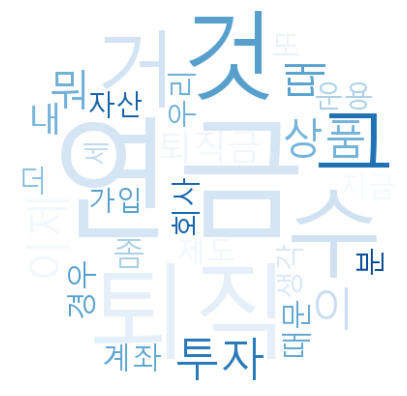

In [136]:
word_cloud(a,b,'퇴직연금노후')

In [95]:
aa = list(mstitle_noun_count['Noun'])
bb = list(mstitle_noun_count['count'])

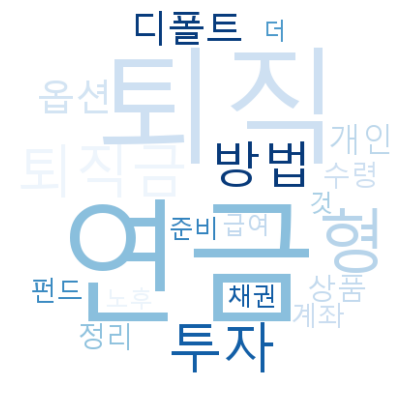

In [97]:
word_cloud(aa,bb,'퇴직연금')

In [98]:
aaa = list(mtitle_noun_count['Noun'])
bbb = list(mtitle_noun_count['count'])

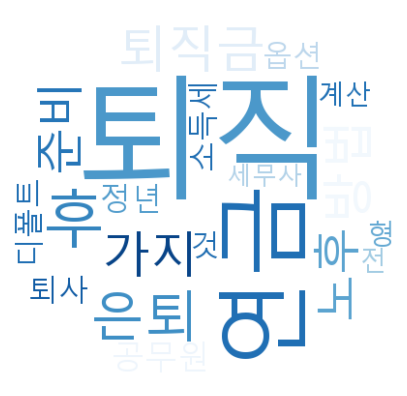

In [99]:
word_cloud(aaa,bbb,'퇴직')